
# **Projeto de Vendas**

dataset do kaggle = https://www.kaggle.com/datasets/kyanyoga/sample-sales-data/data


Hegel Marinho Viana Filho


# **1. Aquisição de Dados e Leitura**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/sales_data_sample.csv', delimiter=',', encoding='latin1')
df.head(5)

#dataset do kaggle = https://www.kaggle.com/datasets/kyanyoga/sample-sales-data/data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.dtypes

#Ver as colunas presentes e os formatos dos dados.

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


In [ ]:
df1 = df[["ORDERDATE", "PRODUCTLINE", "QUANTITYORDERED", "PRICEEACH"]]
df1.head(5)

,ORDERDATE,PRODUCTLINE,QUANTITYORDERED,PRICEEACH
0,2/24/2003 0:00,Motorcycles,30,95.70
1,5/7/2003 0:00,Motorcycles,34,81.35
2,7/1/2003 0:00,Motorcycles,41,94.74
3,8/25/2003 0:00,Motorcycles,45,83.26
4,10/10/2003 0:00,Motorcycles,49,100.00


# **2. Pré-processamento de Dados**

In [ ]:
df1.shape
df1.info()
#Vendo se possui alguma linha com valor nulo
#Não possui

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERDATE        2823 non-null   object 
 1   PRODUCTLINE      2823 non-null   object 
 2   QUANTITYORDERED  2823 non-null   int64  
 3   PRICEEACH        2823 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 88.3+ KB


In [ ]:
df1['ORDERDATE'] = pd.to_datetime(df1['ORDERDATE'])
df1.dtypes
df1.head(5)
#Transformando em formato de datatime

<ipython-input-8-e80d0021ad65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ORDERDATE'] = pd.to_datetime(df1['ORDERDATE'])


,ORDERDATE,PRODUCTLINE,QUANTITYORDERED,PRICEEACH
0,2003-02-24,Motorcycles,30,95.70
1,2003-05-07,Motorcycles,34,81.35
2,2003-07-01,Motorcycles,41,94.74
3,2003-08-25,Motorcycles,45,83.26
4,2003-10-10,Motorcycles,49,100.00


In [ ]:
min = df1["QUANTITYORDERED"].min()
max = df1["QUANTITYORDERED"].max()
df1.loc[:, "QUANTITYORDERED"] = (df1["QUANTITYORDERED"] - min) / (max - min)

#normalizando a quantidade

df1.head(5)

#referência: https://www.geeksforgeeks.org/normalize-a-column-in-pandas/

,ORDERDATE,PRODUCTLINE,QUANTITYORDERED,PRICEEACH
0,2003-02-24,Motorcycles,0.263736,95.70
1,2003-05-07,Motorcycles,0.307692,81.35
2,2003-07-01,Motorcycles,0.384615,94.74
3,2003-08-25,Motorcycles,0.428571,83.26
4,2003-10-10,Motorcycles,0.472527,100.00


# **3. Análise Estatística**


In [ ]:
media_price = df1["PRICEEACH"].mean()
mediana_price = df1["PRICEEACH"].median()
dsvp_price = df1["PRICEEACH"].std()
moda_price = df1["PRICEEACH"].mode()[0]


print("Média do preço:", media_price,'\n' "Mediana do preço:", mediana_price, '\n' "Desvio padrão do preço:", dsvp_price, '\n' "Moda do preço:", moda_price)

Média do preço: 83.65854410201914 
Mediana do preço: 95.7 
Desvio padrão do preço: 20.174276527840703 
Moda do preço: 100.0


# **4. Visualização de Dados**

In [1]:
import matplotlib.pyplot as plt

product_sales = df.groupby("PRODUCTLINE")["QUANTITYORDERED"].sum()
plt.figure(figsize=(10,6))
plt.bar(product_sales.index, product_sales.values, color='skyblue')
plt.xlabel("Produtos")
plt.ylabel("Quantidade Total Vendida")
plt.title("Quantidade Total Vendida por Produto")
plt.xticks(rotation=45)
plt.show()

#Criamos um gráfico de barras para cada produto mostrar sua quantidade total vendida. Usamos o groupby para obter a quantidade total vendida por produto.

NameError: name 'df' is not defined

# **5. K-Vizinhos Mais Próximos- Classificação**

 Usando a mesma base de dados, criei uma coluna binária chamada
 Alta_Venda, onde o valor é 1 se a quantidade vendida for maior que a média e
 0 caso contrário.

 Em seguida, criei um modelo de classificação utilizando o
 algoritmo K-Vizinhos Mais Próximos (KNN) para prever se uma venda será alta
 ou não.

 Avaliei o modelo utilizando a matriz de confusão.

In [ ]:
media_quantidade = df1["QUANTITYORDERED"].mean()
print(media_quantidade)

0.31970119855348333


In [ ]:
df1["Alta_Venda"] = 0 #cria tudo como baixa = 0
df1.head(5)

<ipython-input-12-53c363a60281>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Alta_Venda"] = 0 #cria tudo como baixa = 0


,ORDERDATE,PRODUCTLINE,QUANTITYORDERED,PRICEEACH,Alta_Venda
0,2003-02-24,Motorcycles,0.263736,95.70,0
1,2003-05-07,Motorcycles,0.307692,81.35,0
2,2003-07-01,Motorcycles,0.384615,94.74,0
3,2003-08-25,Motorcycles,0.428571,83.26,0
4,2003-10-10,Motorcycles,0.472527,100.00,0


In [ ]:
for i in range(len(df1)):
    if df1.loc[i, "QUANTITYORDERED"] > media_quantidade:
        df1.loc[i, "Alta_Venda"] = 1

df1.head(5)

#Usei um loop para trocar todos os 0 que deveriam ser 1, comparando com a média.

,ORDERDATE,PRODUCTLINE,QUANTITYORDERED,PRICEEACH,Alta_Venda
0,2003-02-24,Motorcycles,0.263736,95.70,0
1,2003-05-07,Motorcycles,0.307692,81.35,0
2,2003-07-01,Motorcycles,0.384615,94.74,1
3,2003-08-25,Motorcycles,0.428571,83.26,1
4,2003-10-10,Motorcycles,0.472527,100.00,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Preparar os dados para o modelo de classificação
X = df1[["QUANTITYORDERED", "PRICEEACH"]]
y = df1["Alta_Venda"]

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
mean_train = X_train.mean()
std_train = X_train.std()
X_train = (X_train - mean_train) / std_train
X_test = (X_test - mean_train) / std_train

In [ ]:
# Criar e treinar o modelo KNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

# Avaliar o modelo com matriz de confusão e relatório de classificação
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Matriz de Confusão:
 [[295   0]
 [  1 269]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       1.00      1.00      1.00       270

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565



# **6. Agrupamento - K-means**

Utilizei o algoritmo K-means para agrupar os produtos com base em suas
quantidades vendidas e preços. Determinei o número ideal de clusters
utilizando o método do cotovelo (elbow method).

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
# Aplicar K-means para agrupar os produtos com base em quantidade e preço
X_cluster = df1[["QUANTITYORDERED", "PRICEEACH"]]

# Determinar o número ideal de clusters usando o método do cotovelo
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

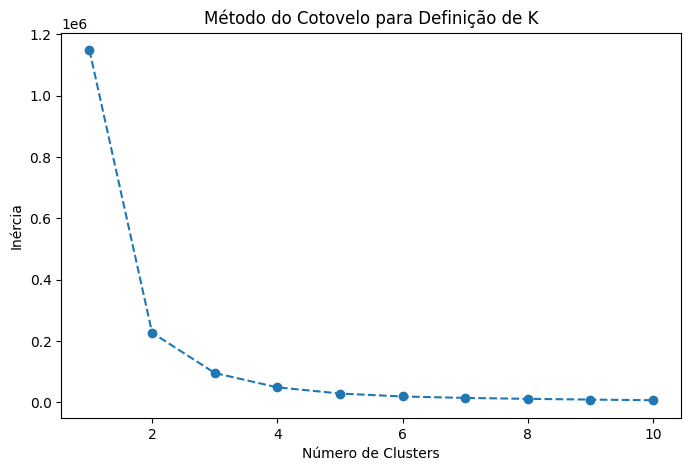

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo para Definição de K")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df1["Cluster"] = kmeans.fit_predict(X_cluster)
print(df1.head())

   ORDERDATE  PRODUCTLINE  QUANTITYORDERED  PRICEEACH  Alta_Venda  Cluster
0 2003-02-24  Motorcycles         0.263736      95.70           0        1
1 2003-05-07  Motorcycles         0.307692      81.35           0        0
2 2003-07-01  Motorcycles         0.384615      94.74           1        1
3 2003-08-25  Motorcycles         0.428571      83.26           1        0
4 2003-10-10  Motorcycles         0.472527     100.00           1        1


<ipython-input-23-eab9e43263b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Cluster"] = kmeans.fit_predict(X_cluster)


# **7. Análise de Clusters**

In [ ]:
# Analisar as características de cada cluster
cluster_summary = df1.groupby("Cluster")[["QUANTITYORDERED", "PRICEEACH"]].mean()
print(cluster_summary)

         QUANTITYORDERED  PRICEEACH
Cluster                            
0               0.321120  71.879416
1               0.319553  98.172812
2               0.318094  47.030713


In [ ]:
# Listar os produtos em cada cluster
for cluster in sorted(df1["Cluster"].unique()):
    print(f"Cluster {cluster}:")
    print(df1[df1["Cluster"] == cluster]["PRODUCTLINE"].value_counts(), "\n")

Cluster 0:
PRODUCTLINE
Classic Cars        179
Vintage Cars        133
Planes              124
Motorcycles          88
Ships                85
Trucks and Buses     48
Trains               28
Name: count, dtype: int64 

Cluster 1:
PRODUCTLINE
Classic Cars        669
Vintage Cars        313
Trucks and Buses    212
Motorcycles         187
Planes              147
Ships               131
Trains               30
Name: count, dtype: int64 

Cluster 2:
PRODUCTLINE
Vintage Cars        161
Classic Cars        119
Motorcycles          56
Trucks and Buses     41
Planes               35
Trains               19
Ships                18
Name: count, dtype: int64 



# **Discursão: **
**Cluster 0:** Este cluster é dominado por Classic Cars e Vintage Cars, que são produtos de nicho e provavelmente têm um apelo emocional ou colecionável. A quantidade média de pedidos é baixa, o que sugere que esses produtos não são comprados em grandes volumes, possivelmente devido ao seu público-alvo específico.

**Cluster 1:** Este cluster é fortemente dominado por Classic Cars e Vintage Cars, mas com uma presença significativa de Trucks and Buses e Motorcycles. A quantidade média de pedidos é semelhante ao Cluster 0, mas o preço médio por unidade é significativamente mais alto. Isso sugere que os produtos neste cluster são itens premium ou de alto valor, como modelos raros ou edições especiais de carros clássicos e vintage.

**Cluster 2:** Este cluster tem uma distribuição mais equilibrada entre Vintage Cars e Classic Cars, mas com uma presença menor de outros produtos, como Motorcycles, Trucks and Buses, e Planes. A quantidade média de pedidos é a mais baixa entre os clusters, e o preço médio por unidade também é o mais baixo. Isso sugere que os produtos neste cluster são itens de menor valor ou menos exclusivos.

# **8. Visualização de Clusters**

Utilizei um gráfico de dispersão, onde cada ponto representa um
produto, e cores diferentes representam os diferentes clusters.

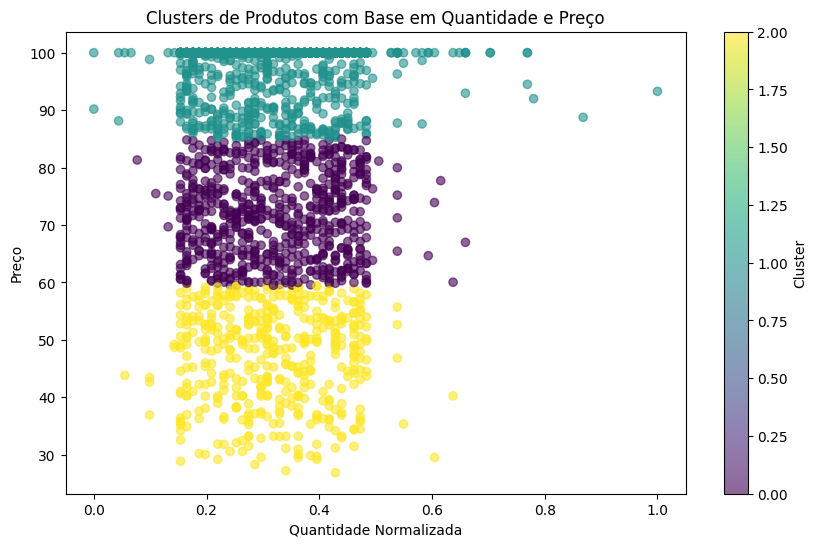

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df1["QUANTITYORDERED"], df1["PRICEEACH"], c=df1["Cluster"], cmap='viridis', alpha=0.6)
plt.xlabel("Quantidade Normalizada")
plt.ylabel("Preço")
plt.title("Clusters de Produtos com Base em Quantidade e Preço")
plt.colorbar(label="Cluster")
plt.show()

# **9. Validação Cruzada**

Realizei uma validação cruzada de 5 vezes para o modelo KNN. Comparei os resultados obtidos e verifiquei a estabilidade do modelo.

In [ ]:
# Validação cruzada de 5 vezes
from sklearn.model_selection import train_test_split, cross_val_score
cv_scores = cross_val_score(knn, X, y, cv=5)
print("Validação Cruzada - Acurácias obtidas:", cv_scores)
print("Média da Acurácia:", np.mean(cv_scores))
print("Desvio Padrão da Acurácia:", np.std(cv_scores))

Validação Cruzada - Acurácias obtidas: [0.95044248 0.91504425 0.83539823 0.80141844 0.82801418]
Média da Acurácia: 0.8660635159731376
Desvio Padrão da Acurácia: 0.0567203994642492


A validação cruzada de 5 vezes realizada para o modelo KNN resultou em acurácias que variam entre 0.8014 e 0.9504, com uma média de 0.8661 e um desvio padrão de 0.0567.

O modelo KNN apresenta uma acurácia média satisfatória, mas com alguma variabilidade entre as execuções da validação cruzada. Isso sugere que seu desempenho pode ser sensível às diferentes divisões dos dados, o que pode ser melhorado com ajustes nos hiperparâmetros e pré-processamento adequado.

# **10. Tomada de Decisão baseada em Clustering**

In [ ]:
from scipy.stats import ttest_ind
# Estratégias de marketing baseadas nos clusters
def define_strategy(cluster):
    if cluster == 0:
        return "Reduzir preços e criar promoções"
    elif cluster == 1:
        return "Focar em marketing específico e branding"
    elif cluster == 2:
        return "Aumentar preços devido à alta demanda"
    else:
        return "Manter estratégia atual"

df1["MarketingStrategy"] = df1["Cluster"].apply(define_strategy)
print(df1[["PRODUCTLINE", "Cluster", "MarketingStrategy"]].drop_duplicates())

# Aplicar mudanças simuladas nos preços
def adjust_price(row):
    if row["Cluster"] == 0:
        return row["PRICEEACH"] * 0.9
    elif row["Cluster"] == 2:
        return row["PRICEEACH"] * 1.1
    return row["PRICEEACH"]

df1["New_Price"] = df1.apply(adjust_price, axis=1)

# Comparação estatística antes e depois
t_stat, p_value = ttest_ind(df1["PRICEEACH"], df1["New_Price"])
print(f"Teste t: estatística={t_stat:.4f}, p-valor={p_value:.4f}")

# Relatório final
print("\nRelatório de Análise:")
print(f"Média dos preços antes: {df1['PRICEEACH'].mean():.2f}")
print(f"Média dos preços depois: {df1['New_Price'].mean():.2f}")
print(f"Teste t indica que {'há' if p_value < 0.05 else 'não há'} diferença estatisticamente significativa nos preços.")

           PRODUCTLINE  Cluster                         MarketingStrategy
0          Motorcycles        1  Focar em marketing específico e branding
1          Motorcycles        0          Reduzir preços e criar promoções
22         Motorcycles        2     Aumentar preços devido à alta demanda
26        Classic Cars        1  Focar em marketing específico e branding
124       Classic Cars        0          Reduzir preços e criar promoções
125       Classic Cars        2     Aumentar preços devido à alta demanda
212   Trucks and Buses        1  Focar em marketing específico e branding
237   Trucks and Buses        0          Reduzir preços e criar promoções
386   Trucks and Buses        2     Aumentar preços devido à alta demanda
475       Vintage Cars        1  Focar em marketing específico e branding
495       Vintage Cars        2     Aumentar preços devido à alta demanda
510       Vintage Cars        0          Reduzir preços e criar promoções
552             Planes        1  Focar

<ipython-input-31-a01c01963d4f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["MarketingStrategy"] = df1["Cluster"].apply(define_strategy)
<ipython-input-31-a01c01963d4f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["New_Price"] = df1.apply(adjust_price, axis=1)
